# Motion Correction
---

#### Overview
Correct motion artefacts in timelapse microscopy* data.

\* or macroscopy

#### Outline
1. Load data.
2. Run SIFT + RANSAC -based alignment.
3. Visualize results.

#### Packages

In [1]:
from pathlib import Path
import pandas as pd

from neuroprocessing.align import StackAligner
from neuroprocessing.plotting.motion_correction_plots import plot_motion_correction

#### Set file locations for experimental data

In [2]:
# path to (local) storage point for experimental data
dir_experiments = Path("/Users/ryanlane/Projects/neuroimaging-pruritogens/data/")

# date and name of a particular experiment to analyze
date = "2024-02-29"
experiment = "Zyla_5min_LHLstim_2son4soff_1pt25pctISO_5"

# extract the tif file
dir_data = dir_experiments / date/ experiment
filename = list((dir_data).glob("*ome.tif"))[0]
filename

PosixPath('/Users/ryanlane/Projects/neuroimaging-pruritogens/data/2024-02-29/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_5/Zyla_5min_LHLstim_2son4soff_1pt25pctISO_5_MMStack_Pos0.ome.tif')

## Align timelapse

In [4]:
aligner = StackAligner(filename)
aligner.align()

1 643 n_scales 4 c_dog 0.014666666666666668
2 513 n_scales 4 c_dog 0.016133333333333336
3 405 n_scales 4 c_dog 0.01774666666666667
4 259 n_scales 3 c_dog 0.01952133333333334
5 183 n_scales 3 c_dog 0.021473466666666673
6 145 n_scales 3 c_dog 0.02362081333333334


100%|███████████████████████████████████████████████████████████████████████████████████████| 2999/2999 [03:12<00:00, 15.57it/s]


#### Check results

In [5]:
aligner.export()
df_calc = pd.read_csv(dir_data / "alignment_data.csv")\
    .drop("Frame ID", axis=1)\
    .drop(0)\
    .reset_index(drop=True)

df_calc.tail(10)

,Translation X,Translation Y,Rotation,N candidates,N matches
2989,-1.237891,0.064840,-0.001352,146,146
2990,-1.219144,0.053448,-0.001306,146,145
2991,-1.208672,0.034097,-0.001292,149,148
2992,-1.170088,0.028607,-0.001224,143,141
2993,-1.257229,0.139911,-0.001504,141,141
2994,-1.269343,0.175568,-0.001524,145,145
2995,-1.247893,0.125900,-0.001469,147,147
2996,-1.230673,0.128622,-0.001378,153,153
2997,-1.196488,0.112727,-0.001371,155,155
2998,-1.260952,0.137173,-0.001514,145,145


## Compare before and after

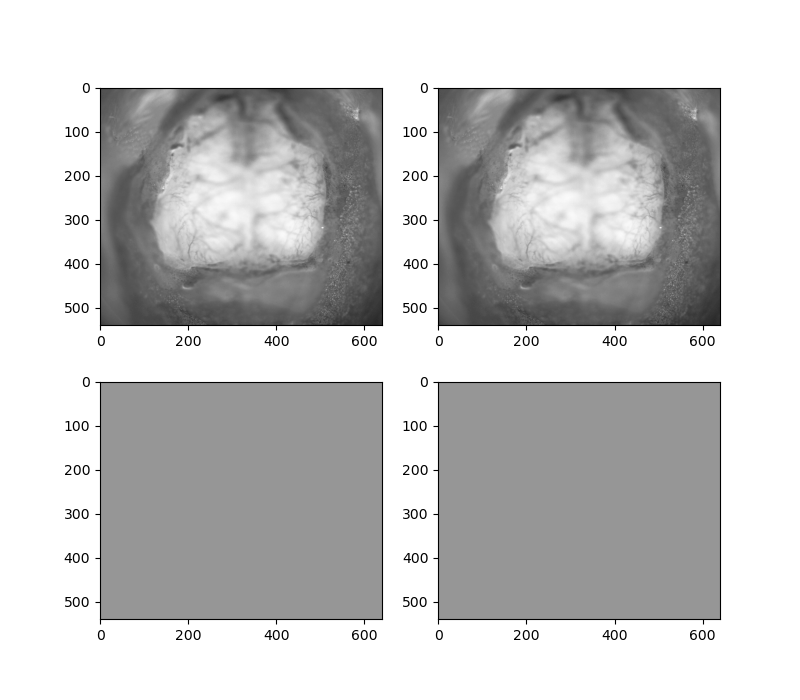

In [6]:
%matplotlib ipympl

plot_motion_correction(
    aligner.stack,
    aligner.stack_aligned
)